<font color='blue'>Cell 1: Importing libraries

In [61]:
# nothing to import 

<font color='blue'>Cell 2: Read in the dataset

In [62]:
 ## Instructions for user: 
# Make sure you have downloaded the file "converted_data.csv"' on to your computer
# 1) Click the file icon on the left bar of the google colab interface
# 2) Click the 'upload to session storage' button
# 3) find the "converted_data.csv" file on your computer and upload it the session storage

data <- read.csv("converted_data.csv")
dim(data)
summary(data)

[1] 7117   11

       X          Protein          AA.Sequence        SST3.Sequence     
 Min.   :   0   Length:7117        Length:7117        Length:7117       
 1st Qu.:1779   Class :character   Class :character   Class :character  
 Median :3558   Mode  :character   Mode  :character   Mode  :character  
 Mean   :3558                                                           
 3rd Qu.:5337                                                           
 Max.   :7116                                                           
     Length        B.Count          C.Count            H.Count      
 Min.   :  29   Min.   :0.0000   Min.   :0.007042   Min.   :0.0000  
 1st Qu.:  93   1st Qu.:0.1084   1st Qu.:0.307210   1st Qu.:0.1765  
 Median : 159   Median :0.2669   Median :0.362745   Median :0.3484  
 Mean   : 205   Mean   :0.2665   Mean   :0.376588   Mean   :0.3568  
 3rd Qu.: 274   3rd Qu.:0.3913   3rd Qu.:0.425926   3rd Qu.:0.4900  
 Max.   :1419   Max.   :0.8243   Max.   :1.000000   Max.   :0.9930  
      

<font color='blue'>Cell 3:  Remove proteins with non standard amino acids

In [63]:
# Returns the data without the rows of non standard amino acids
# I.e it Checks for any 'X's or ';'s in the Amino Acid sequences
removeNonStandardAA <- function(crude_data){
        aa_nonstd <- c()
        # iterates over every row
        for (i in 1:nrow(crude_data)){
                # checks for any rows with 'X'
                if (grepl('X',crude_data[i,3], fixed = TRUE)){
                        aa_nonstd <- c(aa_nonstd,i)
                # Checks for any rows with ';'
                }else if (grepl(';',crude_data[i,3], fixed = TRUE)){
                        aa_nonstd <- c(aa_nonstd,i)
                }
        }
        # removes the specified rows from the data set
        std_list <- crude_data[-aa_nonstd,]
        x <- list(std_list, aa_nonstd)
        return(x)
}
#Current Dataset dimensions
dim(data)
data <- removeNonStandardAA(data)[[1]]
# Dataset dimenstions after nonstandard data removed
dim(data)

[1] 7117   11

[1] 7105   11

<font color='blue'>Cell 4: Data set verification

In [64]:
# Check the data set to make sure no data is missing and check the class labels

verifyDatasets <- function(data){
        # if any of the rows have missing values return missing data
        all_good <- TRUE
        for (i in 1:ncol(data)){
                for (j in 1:nrow(data)){
                        if(is.null(data[j,i])){
                                cat('Null Data at row: ',j,' and column: ',i)
                                all_good <- FALSE
                                }
                }
        }
        if (all_good){
                print("Dataset is complete. There are no missing values")
        }
        
}
verifyDatasets(data)


[1] "Dataset is complete. There are no missing values"


<font color='blue'>Cell 5: Data set splitting function

In [65]:
# The below functions first reduces the data size by the limit fraction, 
# and then splits the reduced data into training and testing sets based on
# the train_size fraction
splitDataset <- function(data, limit, train_size){
        # reduce the number of rows of data
        limit <- limit*nrow(data)
        data <- data[sample(1:nrow(data), limit),]
        # create the training size based on the train_size fraction
        train_size <- nrow(data)*train_size
        training_indices <- sample(1:nrow(data), train_size)
        # create the new training and testing datasets
        training_data <- data[training_indices,]
        testing_data <- data[-training_indices,]
        # returns a list of the two datasets
        x <- list(training_data,testing_data)
        return(x)
}

<font color='blue'>Cell 6: Creating the amino acid encoding alphabet

In [66]:
#Defining codes for the alphabet
aa_codes <-  c('A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T',
                     'V','W','Y','NULL')
#An identity matrix is one such that all diagonal elements are equal to 1, while the rest are 0
aa_alphabet <- matrix(diag(21), nrow = 21, ncol = 21, dimnames = list(aa_codes,aa_codes))
aa_alphabet

,A,C,D,E,F,G,H,I,K,L,⋯,N,P,Q,R,S,T,V,W,Y,NULL
A,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
C,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
D,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
E,0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
F,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
G,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
H,0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
I,0,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
K,0,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
L,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0


<font color='blue'>Cell 7: Creating the secondary structure encoding alphabet


In [67]:
# Defining the encoding matrix for the structures
sst3_codes <-  c('B','C','H')
sst3_alphabet <-  matrix(diag(3), nrow = 3, ncol = 3, dimnames = list(sst3_codes,sst3_codes))
sst3_alphabet


,B,C,H
B,1,0,0
C,0,1,0
H,0,0,1


<font color='blue'>Cell 8: Amino acid encoding and windowing function

In [68]:
aaEncode <- function(data_set,window_size){
        # null size is half of the window size (rounded down)
        null_size <-  floor(window_size/2)
        # the first and last 8 rows will be padded with 'null' rows
        null_pad <- rep((aa_alphabet[,'NULL']),null_size)
        # each row will be 17*21 = 357 bits long, with 17 1's , and the rest 0's. 
        row_length <- window_size*ncol(aa_alphabet)
        # iterates over every row in the data set
        for (i in 1:nrow(data_set)){
                current_sequence <- numeric()
                current_row <- unlist(strsplit(data_set[i,3], "" ))
                
                encoded_sequence <- numeric()
                # encodes each amino acid in current AA sequence into bits
                for (j in 1:length(current_row)){
                        base_code <- aa_alphabet[,current_row[j]]
                        encoded_sequence <- c(encoded_sequence,base_code)
                        
                }
                # pads the front and back ends with the 'NULL' Sequence
                encoded_sequence <- c(null_pad, encoded_sequence)
                encoded_sequence <- c(encoded_sequence, null_pad)
                
                #The encoded sequences representing the amino acids are gathered and flattened
                # in to groups according to the window size
                x_data <- array(dim = c(length(current_row),row_length))
                
                # Windowing :  
                # The encoded sequences representing the amino acids are gathered in groups according to the window size
                for (k in 0:(length(current_row)-1)){
                        x_data[k+1,] <- encoded_sequence[(1+k*21):(row_length+k*21)]
                }
                
                # Add the array of data to the array of all the encoded sequences
                if (i==1){ #the first iteration creates the final array
                        aa_encoded <- x_data
                }else{ # Every iteration after the first adds on to the final array
                        aa_encoded <- rbind(aa_encoded,x_data)
                }
                
        }
        return(aa_encoded)
}

<font color='blue'>Cell 9: Secondary Structure encoding function

In [69]:
sst3Encode <- function(data_set){
        
                              
        # iterate over each row of the data set
        for (i in 1:nrow(data_set)){
                sst3_seq <- unlist(strsplit(data_set[i,4],""))
                current_seq_encoded <- array(dim = c(length(sst3_seq),3))
                # iterate over the current sequence for each structure shape
                for (j in 1:length(sst3_seq)){
                        sst_code <-  sst3_alphabet[,sst3_seq[j]]
                        current_seq_encoded[j,] <- sst_code
                }
                # For the first run, create the encoded array,
                if (i  == 1){ 
                        sst3_encoded <- current_seq_encoded
                        
                }else{# For all other runs, add onto to the encoded array
                        sst3_encoded <- rbind(sst3_encoded,current_seq_encoded)
                }
                
                
        }
        return(sst3_encoded)
}

<font color='blue'>Cell 10: Running the train/test splitting function

In [70]:
data_frac <- 0.01     #data_frac is the fraction of the total data to use for both training and test sets
train_frac <-  0.7    #train_frac is the fraction of the used set to use for training

new_data <- splitDataset(data, data_frac, train_frac)
train_data <- new_data[[1]]
test_data <- new_data[[2]]

<font color='blue'>Cell 11: Encoding the training/testing input and output data

In [71]:
window_size <- 17  # A window size of 17 allows 8 amino acids bere, and after the current amino acid.
x_train <- aaEncode(train_data,window_size) 
x_test <- aaEncode(test_data,window_size)

y_train <- sst3Encode(train_data)
y_test <- sst3Encode(test_data)



<font color='blue'>Cell 12: Define Activation Functions

In [72]:
# sigmoid function
sigmoid <- function(x){
  return (1/(1+exp(-x)))
}
# sigmoid derivative
sigmoid_deriv <- function(x){
  return (sigmoid(x)*(1-sigmoid(x)))
}
# soft max
user_softmax <- function(A){
  return (exp(A)/rowSums(exp(A)))
}


<font color='blue'>Cell 13: Define Training *Function*

In [73]:
training <- function(lr, batch_size, epochs, x_train){
  x_train <- x_train;
  hidden_size <- 5;
  
  w0 <- 2*matrix(runif(window_size*21*hidden_size), ncol = hidden_size, byrow = TRUE)-1
  w1 <- 2*matrix(runif(hidden_size*3), ncol = 3)-1
  
  bh <- rnorm(hidden_size)
  bo <- rnorm(3)
  
  num_batch <- floor(nrow(x_train)/batch_size);
  
  #Errors - for graph later
  errors <-  list()
  
  for (epoch in 0:(epochs-1)){
    #####  Feed Forward #######
    for (current_batch in 0:num_batch){
      # Feed Forward Phase 1
      batch_start <- current_batch * batch_size;
      batch_end <- batch_start + batch_size;
      if (batch_end>nrow(x_train)){
        batch_end <- nrow(x_train)
      }
      input_batch <- x_train[batch_start:batch_end,];
      
      zh <- (input_batch %*% w0) + bh;
      layer1 <-  sigmoid(zh);
      
      # Feed Forward Phase 2
      zo <- (layer1 %*% w1) + bo;
      layer2 <- user_softmax(zo);
        
      ##### Back Propagation ######
        
      # Back propagation phase 1
      labels_batch <- y_train[batch_start:batch_end,];
      layer2_error = layer2 - labels_batch;
      layer2w_delta = (t(layer1) %*% layer2_error);
      
      layer2b_delta <- layer2_error
        
      # Back porpagation phase 2
      
      dcost_dah <- (layer2_error %*% t(w1))
      dah_dzh <- sigmoid_deriv(zh);
      
      layer1_error <- dah_dzh * dcost_dah;
      layer1w_delta <- (t(input_batch) %*% layer1_error);
      
      layer1b_delta <- layer1_error
      
      # Update Weights
      w0 = w0 - (lr*layer1w_delta);
      bh =  bh - (lr * colSums(layer1b_delta));
      
      w1 =  w1 - (lr * layer2w_delta);
      bo = bo - (lr * colSums(layer2b_delta));
      
    }
    
    # Update error(s)
    error <-  mean(abs(layer2_error));
    errors = append(errors,error)
  }
  return_list <- list(w0, bh, w1, bo, error, errors);
  return (return_list);
  
}


<font color=blue> Cell 14 : Evaluation Function definition

In [74]:
evaluation <- function(params, tst_set){
  w0 <-  params[[1]]
  bh <-  params[[2]]
  w1 <-  params[[3]]
  bo <-  params[[4]]
  
  #Phase 1
  zh <- (tst_set %*% w0) + bh
  layer1 <-  sigmoid(zh);
  
  # Phase 2 layer2 is final output
  zo <- (layer1 %*% w1) +bo;
  layer2 <- user_softmax(zo);
  
  return (layer2);
}

<font color=blue> Cell 15: Sequence Prediction Function

In [75]:
# A secondary structure sequence predictor that returns a decoded structure sequence 
# for an input amino acid sequence
sequence_prediction <- function(flnm){
    # Read in Amino Acid sequence
    test_seq_orig <- readLines(flnm,warn = FALSE);
    # Alter to fit aaEncode function 
    if (length(test_seq_orig) > 1){
      test_seq_orig = test_seq_orig[1]
    }
    test_seq <- cbind('0','1',test_seq_orig);
    # bit encode amino acid sequence
    seq1 <- aaEncode(test_seq, 17);
    # evaluate sequence with trained_parameters
    seq_pred <- evaluation(trained_params, seq1)
    # turn bit coded predicted sequence into B,C,H sequence
    pred_bit_ss <- apply(seq_pred, 1, which.max)
    predicted_ss <- character();
    for (ss in pred_bit_ss){
      if (ss == 1){
        predicted_ss <- paste(predicted_ss,'B') # Beta sheet
      }else if(ss == 2){
        predicted_ss <- paste(predicted_ss,'C') # spirals
      }else if (ss == 3){
        predicted_ss <- paste(predicted_ss,'H') # helix
      }else{
        predicted_ss <- paste(predicted_ss,'X') # Error marker
      }
    }
    cat("Amino Acid Sequence: ", test_seq_orig);
    
    cat("\nPredicted Structure: ", predicted_ss);
    
    
}

<font color=blue> Cell 16 : Selecting parameters and training the model

In [76]:
# Set parameters
learning_rate <- 0.001
batch_size = 50
epochs = 100

# Call upon the training function
trained_data <- training(learning_rate, batch_size, epochs, x_train)  

# break outputted list into different parameters
trained_params <- trained_data[1:4]
error <- trained_data[[5]]
errors <- trained_data[[6]]

<font color=blue>Cell 17: Plotting the Training Errors

Training Accuracy:  66 %

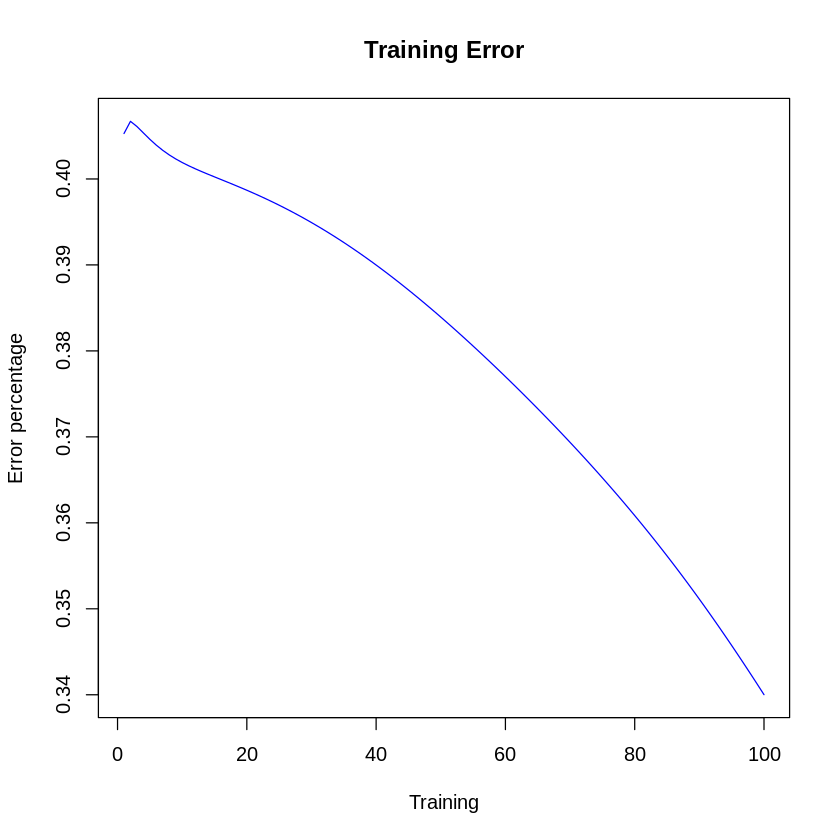

In [77]:
one_to_100 <- c(1:100)
accuracy <- signif(((1-error)*100),4)
accuracy <- paste(accuracy,"%")
plot(one_to_100, errors ,main="Training Error", ylab = "Error percentage",
     xlab = "Training", type = "l", col="blue")

cat("Training Accuracy: ",accuracy)

<font color=blue> Cell 18: Running the evaluation function

In [78]:
prediction <- evaluation(trained_params,x_test)


dim(prediction)
dim(y_test)
min <- 10
max <- 25
results <- cbind("",round(prediction[min:max,],2),"",y_test[min:max,])
colnames(results)<-c('Predictions:','B','C','H','Actual:', 'B','C','H')
results

[1] 5553    3

[1] 5553    3

Predictions:,B,C,H,Actual:,B,C,H
,0.42,0.38,0.2,,1,0,0
,0.21,0.7,0.09,,1,0,0
,0.27,0.63,0.1,,0,1,0
,0.22,0.48,0.3,,0,1,0
,0.42,0.42,0.16,,0,1,0
,0.41,0.32,0.27,,1,0,0
,0.17,0.5,0.33,,1,0,0
,0.4,0.19,0.42,,1,0,0
,0.15,0.12,0.73,,1,0,0
,0.33,0.19,0.48,,1,0,0


<font color='blue'>Cell 19: Creating the Confustion Matrix 

In [79]:
# Applying the which.max function across each row of the predicted values.
predicted_values <- apply(prediction, 1, which.max)
# Doing the same with the y_test dataset
observed_values <- apply(y_test, 1, which.max)
# Create the table
table <- table(predicted_values, observed_values)
#Creating the Confustion Matrix'C','H')
colnames(table) <- c('B','C','H') 

table
# Function to normalize the confusion matrix
normalizeCM <- function(cm){
        cm_norm <- cm
        for ( i in 1:nrow(cm)){
                for ( j in 1:ncol(cm)){
                        cm_norm[i,j] <- cm[i,j]/sum(cm[i,])
                }
        }
        return(round(cm_norm, 2))
}
cat("\n")
cat("Normalized Confusion Matrix: ")
cat("\n")
normalizeCM(table)

                

                observed_values
predicted_values    B    C    H
               1  209  188  176
               2  526 1116  578
               3  600  695 1465


Normalized Confusion Matrix: 


                observed_values
predicted_values    B    C    H
               1 0.36 0.33 0.31
               2 0.24 0.50 0.26
               3 0.22 0.25 0.53

<font color='blue'>Cell 20: Running the sequence prediction

In [80]:
filename <- "sequence1.txt";
sequence_prediction(filename);

Amino Acid Sequence:  TTFTELMQQLFLKLGLNHQVNENDVYTFEVDGHIQVLIACYHQQWVQLFSELGADLPTNDNLFGEHWPAHVQGRLDGKPILWSQQSLVGLDIDEMQAWLERFIDDIEQRK
Predicted Structure:   B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C H B C